In [1]:
pip install imbalanced-Learn

Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [2]:
import pandas as pd
import numpy 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
df=pd.read_csv(r"Datasets/Data_u.csv")

C:\Users\vsneg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,sport,dport,pkts,bytes,seq,dur,mean,stddev,sum,min,...,srate,drate,attack,category,subcategory,proto,saddr,daddr,state,record
0,138,138,4,986,15,1080.37891,0.00000,0.00000,0.00000,0.00000,...,0.00278,0.00000,0,Normal,Normal,3,11,18,4,2
1,60864,443,12,1053,12,112.04757,0.02427,0.01594,0.07281,0.00579,...,0.06247,0.02677,0,Normal,Normal,2,6,8,3,2
2,138,138,4,1086,23,731.27210,0.00010,0.00000,0.00021,0.00010,...,0.00410,0.00000,0,Normal,Normal,3,12,18,4,2
3,36682,22,28,5098,30,0.48960,0.48960,0.00000,0.48960,0.48960,...,24.50990,28.59489,1,Theft,Data_Exfiltration,2,4,19,3,2
4,36684,22,31,5472,31,3.20705,3.20705,0.00000,3.20705,3.20705,...,4.05358,4.98902,1,Theft,Data_Exfiltration,2,4,19,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151178,51760,3306,13,1113,20596,0.19769,0.19769,0.00000,0.19769,0.19769,...,30.35009,25.29174,1,Reconnaissance,Service_Scan,2,4,19,3,2
151179,34720,3306,13,1113,20597,0.19811,0.19811,0.00000,0.19811,0.19811,...,30.28651,25.23876,1,Reconnaissance,Service_Scan,2,3,19,3,2
151180,37616,3306,13,1113,20598,0.19890,0.19890,0.00000,0.19890,0.19890,...,30.16652,25.13877,1,Reconnaissance,Service_Scan,2,2,19,3,2
151181,46406,3306,13,1113,20599,0.19804,0.19804,0.00000,0.19804,0.19804,...,30.29752,25.24793,1,Reconnaissance,Service_Scan,2,1,19,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151183 entries, 0 to 151182
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sport        151183 non-null  object 
 1   dport        151183 non-null  object 
 2   pkts         151183 non-null  int64  
 3   bytes        151183 non-null  int64  
 4   seq          151183 non-null  int64  
 5   dur          151183 non-null  float64
 6   mean         151183 non-null  float64
 7   stddev       151183 non-null  float64
 8   sum          151183 non-null  float64
 9   min          151183 non-null  float64
 10  max          151183 non-null  float64
 11  spkts        151183 non-null  int64  
 12  dpkts        151183 non-null  int64  
 13  sbytes       151183 non-null  int64  
 14  dbytes       151183 non-null  int64  
 15  rate         151183 non-null  float64
 16  srate        151183 non-null  float64
 17  drate        151183 non-null  float64
 18  attack       151183 non-

In [6]:
df.drop(['category', 'subcategory','sport','dport'], axis=1, inplace=True)

In [7]:
df

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,attack,proto,saddr,daddr,state,record
0,4,986,15,1080.37891,0.00000,0.00000,0.00000,0.00000,0.00000,4,...,0,0.00278,0.00278,0.00000,0,3,11,18,4,2
1,12,1053,12,112.04757,0.02427,0.01594,0.07281,0.00579,0.04468,8,...,356,0.09817,0.06247,0.02677,0,2,6,8,3,2
2,4,1086,23,731.27210,0.00010,0.00000,0.00021,0.00010,0.00011,4,...,0,0.00410,0.00410,0.00000,0,3,12,18,4,2
3,28,5098,30,0.48960,0.48960,0.00000,0.48960,0.48960,0.48960,13,...,3458,55.14728,24.50990,28.59489,1,2,4,19,3,2
4,31,5472,31,3.20705,3.20705,0.00000,3.20705,3.20705,3.20705,14,...,3670,9.35441,4.05358,4.98902,1,2,4,19,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151178,13,1113,20596,0.19769,0.19769,0.00000,0.19769,0.19769,0.19769,7,...,581,60.70018,30.35009,25.29174,1,2,4,19,3,2
151179,13,1113,20597,0.19811,0.19811,0.00000,0.19811,0.19811,0.19811,7,...,581,60.57302,30.28651,25.23876,1,2,3,19,3,2
151180,13,1113,20598,0.19890,0.19890,0.00000,0.19890,0.19890,0.19890,7,...,581,60.33304,30.16652,25.13877,1,2,2,19,3,2
151181,13,1113,20599,0.19804,0.19804,0.00000,0.19804,0.19804,0.19804,7,...,581,60.59504,30.29752,25.24793,1,2,1,19,3,2


<AxesSubplot:xlabel='attack', ylabel='count'>

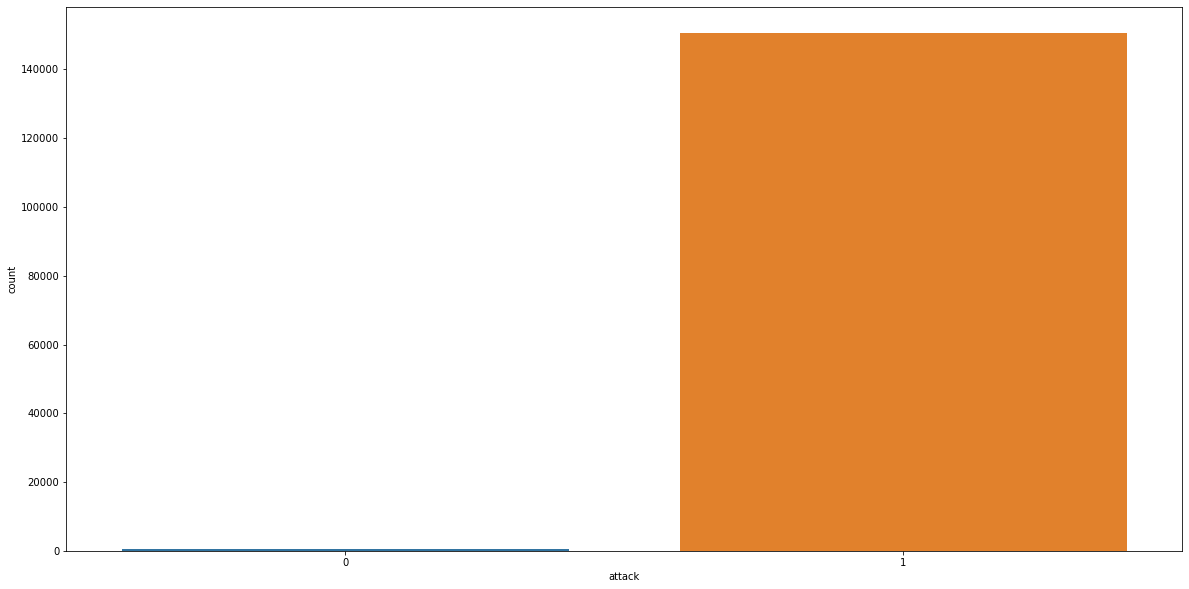

In [8]:
fig_dim=(20,10)
fig,ax=plt.subplots(figsize=fig_dim)
sns.countplot(x="attack",data=df,ax=ax)

## Label Encoding

In [9]:
le = preprocessing.LabelEncoder()
df['attack'] = le.fit_transform(df.attack.values)

In [10]:
X=df.drop(["attack"], axis="columns")
Y=df["attack"]

## Over-sampling (SMOTE)

In [11]:
oversample = SMOTE()
x_sm,y_sm = oversample.fit_resample(X, Y)

In [12]:
y_sm.value_counts()

0    150576
1    150576
Name: attack, dtype: int64

In [13]:
df = pd.concat([x_sm, y_sm], axis=1, join='inner')

In [14]:
df

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,proto,saddr,daddr,state,record,attack
0,4,986,15,1080.378910,0.000000,0.000000,0.000000,0.000000,0.000000,4,...,0,0.002780,0.002780,0.000000,3,11,18,4,2,0
1,12,1053,12,112.047570,0.024270,0.015940,0.072810,0.005790,0.044680,8,...,356,0.098170,0.062470,0.026770,2,6,8,3,2,0
2,4,1086,23,731.272100,0.000100,0.000000,0.000210,0.000100,0.000110,4,...,0,0.004100,0.004100,0.000000,3,12,18,4,2,0
3,28,5098,30,0.489600,0.489600,0.000000,0.489600,0.489600,0.489600,13,...,3458,55.147280,24.509900,28.594890,2,4,19,3,2,1
4,31,5472,31,3.207050,3.207050,0.000000,3.207050,3.207050,3.207050,14,...,3670,9.354410,4.053580,4.989020,2,4,19,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301147,2,180,12,0.007257,0.007257,0.000000,0.007257,0.007257,0.007257,1,...,90,137.793647,0.000000,0.000000,3,2,1,1,2,0
301148,8,1521,77,117.490805,0.018120,0.000152,0.026625,0.017968,0.018271,4,...,1202,44.708391,0.009098,0.009098,2,7,45,1,2,0
301149,2,216,17900,0.007845,0.007845,0.000000,0.007845,0.007845,0.007845,1,...,145,127.445312,0.000000,0.000000,3,4,90,1,2,0
301150,82319,78625694,2,1479.676916,4.962513,0.314673,1471.954689,0.268852,4.999874,82319,...,0,67.630884,67.630884,0.000000,2,8,22,3,2,0


In [15]:
X=df.drop(["attack"], axis="columns")
Y=df["attack"]

# Considering the best 10 features through Feature Selection(SelectKBest)

## Feature Selection

In [16]:
fs = SelectKBest(score_func=f_classif, k=10)
fs.fit(X, Y)

SelectKBest()

# Top 10 features for the model 

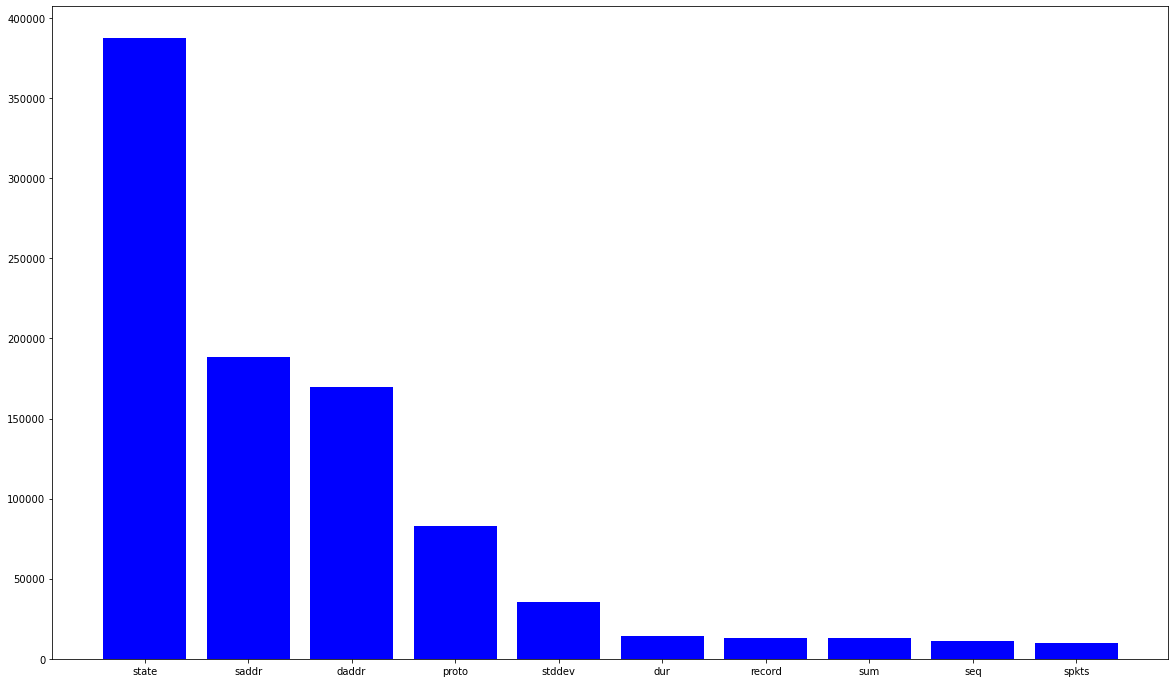

In [17]:
index = np.argsort(fs.scores_)[::-1]

features = []
for i in range(10):
    features.append(df.columns[index[i]])

plt.figure(figsize=(20,12))
plt.bar(features, fs.scores_[index[range(10)]], color='b', align='center')
plt.show()

In [18]:
cols = fs.get_support(indices=True)
df1 = df.iloc[:,cols]

In [19]:
df1["attack"]=df["attack"]

C:\Users\vsneg\AppData\Local\Temp/ipykernel_26580/474461403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["attack"]=df["attack"]


## Correlation of each column

In [20]:
df1.corr()

,seq,dur,stddev,sum,spkts,proto,saddr,daddr,state,record,attack
seq,1.000000,-0.239174,-0.037207,-0.223012,-0.193063,0.082692,-0.096497,-0.096075,0.203987,-0.057676,0.186793
dur,-0.239174,1.000000,0.088128,0.924544,0.784566,-0.134791,0.249069,-0.141637,-0.203182,0.052487,-0.211743
stddev,-0.037207,0.088128,1.000000,0.076880,0.028819,0.085891,-0.252481,-0.219337,0.009640,-0.344045,0.324662
sum,-0.223012,0.924544,0.076880,1.000000,0.825620,-0.136109,0.226524,-0.120413,-0.200583,0.038907,-0.204647
spkts,-0.193063,0.784566,0.028819,0.825620,1.000000,-0.101710,0.190758,-0.108349,-0.171690,0.044147,-0.179247
proto,0.082692,-0.134791,0.085891,-0.136109,-0.101710,1.000000,0.077626,0.355291,-0.643196,-0.169034,-0.465277
saddr,-0.096497,0.249069,-0.252481,0.226524,0.190758,0.077626,1.000000,0.137440,-0.283741,0.164762,-0.620650
daddr,-0.096075,-0.141637,-0.219337,-0.120413,-0.108349,0.355291,0.137440,1.000000,-0.504134,0.159311,-0.600428
state,0.203987,-0.203182,0.009640,-0.200583,-0.171690,-0.643196,-0.283741,-0.504134,1.000000,0.060431,0.750274
record,-0.057676,0.052487,-0.344045,0.038907,0.044147,-0.169034,0.164762,0.159311,0.060431,1.000000,-0.204864


In [21]:
corr_matrix=df1.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

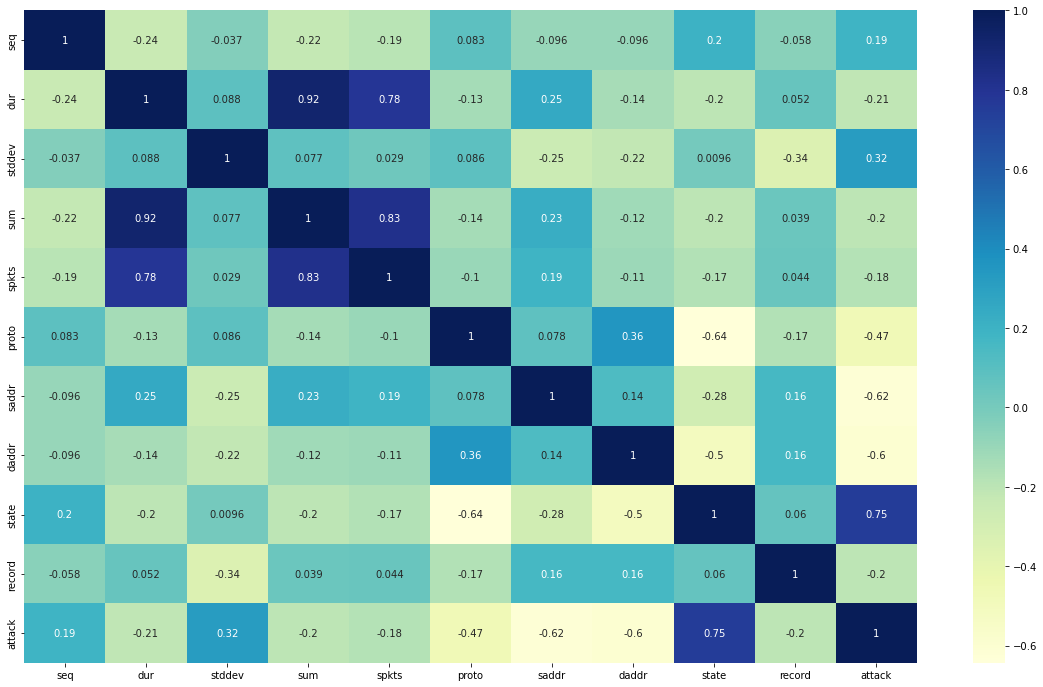

In [22]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [23]:
X=df1.drop(["attack"], axis="columns")
Y=df1["attack"]

## Train-Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [25]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [26]:
scaler_new = StandardScaler()
X = scaler_new.fit_transform(X)

In [27]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [28]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
top10_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [29]:
algorithm.append("Logistic Regression")

In [30]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [31]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [32]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

In [33]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [34]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

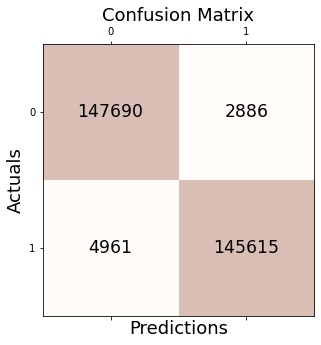

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [36]:
algorithm.append("Decision Tree")

In [37]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [38]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [39]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [40]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [41]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

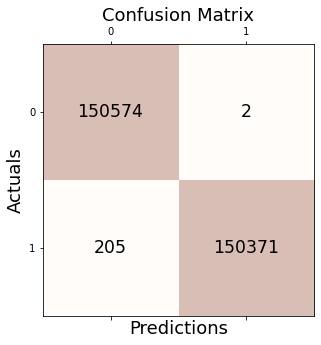

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [43]:
algorithm.append("Random Forest")

In [44]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [45]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [46]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [47]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [48]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

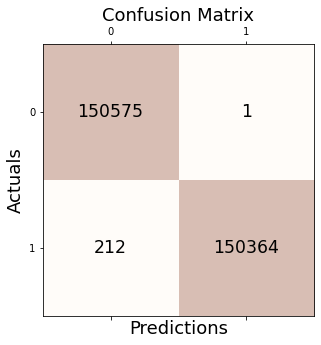

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [50]:
algorithm.append("KNN")

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [52]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [53]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [54]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [55]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

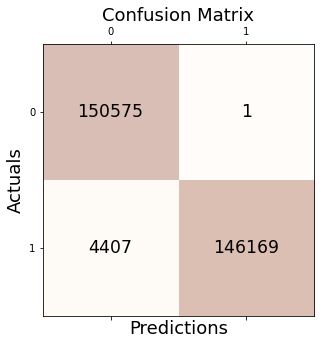

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [57]:
top10_df["Algorithms"]=algorithm
top10_df["Precision"]=precision
top10_df["Recall"]=recall
top10_df["Accuracy"]=accuracy
top10_df["F1-Score"]=f1
top10_df["Error Rate"]=error

In [58]:
top10_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.976287,0.973944,0.973943,0.973759,0.026057
1,Decision Tree,0.999318,0.999313,0.999313,0.999313,0.000687
2,Random Forest,0.999299,0.999293,0.999293,0.999293,0.000707
3,KNN,0.987947,0.985363,0.985363,0.985157,0.014637


<AxesSubplot:xlabel='Algorithms'>

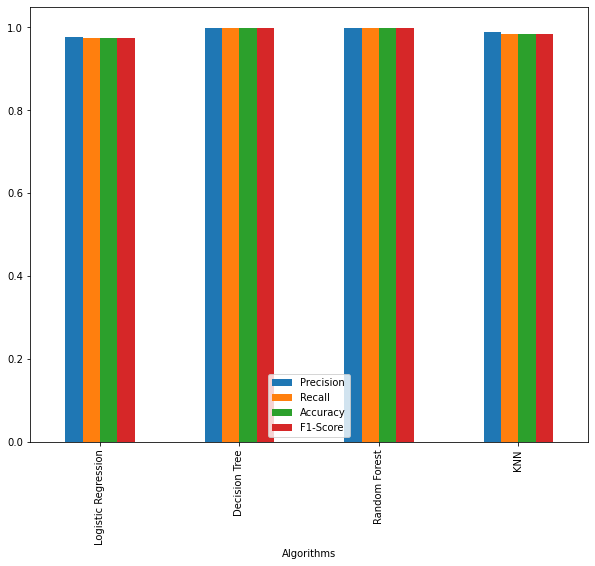

In [59]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top10_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

## ANN

In [60]:
algorithm.append("ANN")

In [61]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) 
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
6588/6588 [==============================] - 7s 979us/step - loss: 0.0630 - accuracy: 0.9839
Epoch 2/10
6588/6588 [==============================] - 7s 1ms/step - loss: 0.0092 - accuracy: 0.9980
Epoch 3/10
6588/6588 [==============================] - 8s 1ms/step - loss: 0.0054 - accuracy: 0.9986
Epoch 4/10
6588/6588 [==============================] - 6s 911us/step - loss: 0.0038 - accuracy: 0.9991
Epoch 5/10
6588/6588 [==============================] - 8s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 6/10
6588/6588 [==============================] - 7s 1ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 7/10
6588/6588 [==============================] - 7s 1ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 8/10
6588/6588 [==============================] - 8s 1ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 9/10
6588/6588 [==============================] - 7s 1000us/step - loss: 0.0021 - accuracy: 0.9996
Epoch 10/10
6588/6588 [==============================] - 7s 1ms/step - loss

In [63]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [64]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [65]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

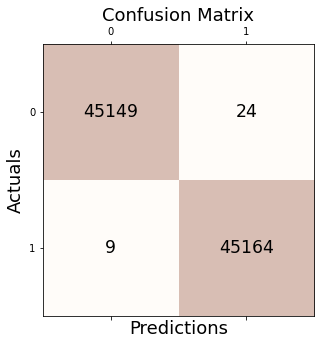

In [66]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [67]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [68]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
top10_df = pd.DataFrame(columns = column_names)

In [69]:
top10_df["Algorithms"]=algorithm
top10_df["Precision"]=precision
top10_df["Recall"]=recall
top10_df["Accuracy"]=accuracy
top10_df["F1-Score"]=f1
top10_df["Error Rate"]=error

In [70]:
top10_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.976287,0.973944,0.973943,0.973759,0.026057
1,Decision Tree,0.999318,0.999313,0.999313,0.999313,0.000687
2,Random Forest,0.999299,0.999293,0.999293,0.999293,0.000707
3,KNN,0.987947,0.985363,0.985363,0.985157,0.014637
4,ANN,0.999635,0.999635,0.999635,0.999635,0.000365


<AxesSubplot:xlabel='Algorithms'>

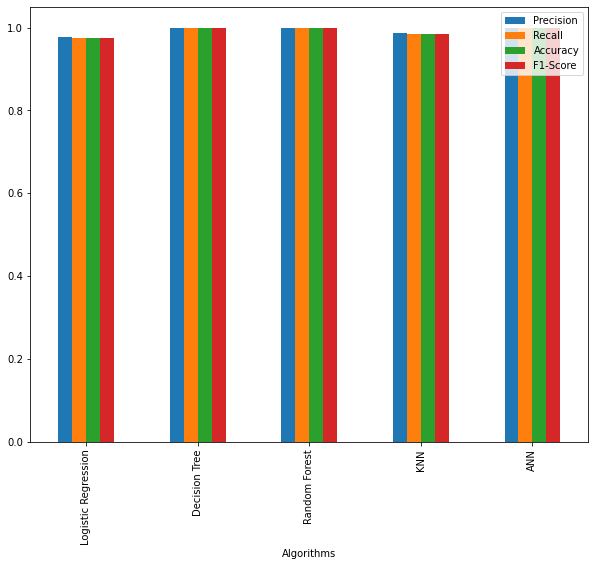

In [71]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top10_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# Considering the best 15 features through Feature Selection(SelectKBest)

In [72]:
X=df.drop(["attack"], axis="columns")
Y=df["attack"]

## Feature Selection

In [73]:
fs = SelectKBest(score_func=f_classif, k=15)
fs.fit(X, Y)

SelectKBest(k=15)

# Top 15 features for the model 

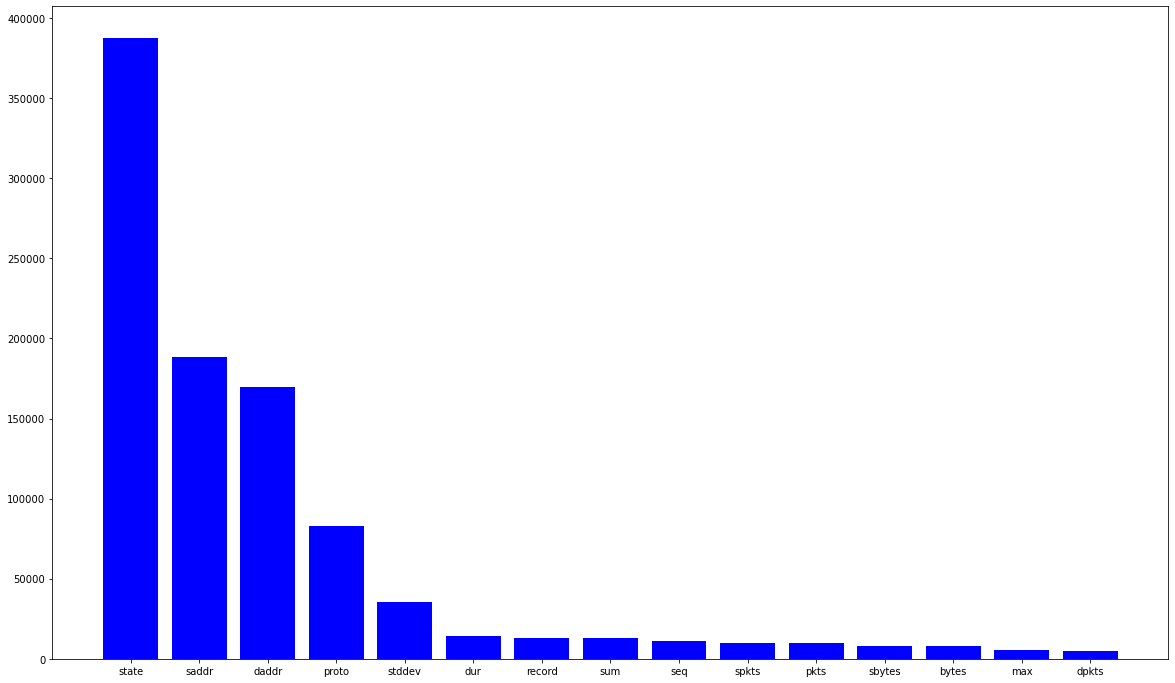

In [74]:
index = np.argsort(fs.scores_)[::-1]

features = []
for i in range(15):
    features.append(df.columns[index[i]])

plt.figure(figsize=(20,12))
plt.bar(features, fs.scores_[index[range(15)]], color='b', align='center')
plt.show()

In [75]:
cols = fs.get_support(indices=True)
df2 = df.iloc[:,cols]

In [76]:
df2["attack"]=df["attack"]

C:\Users\vsneg\AppData\Local\Temp/ipykernel_26580/982826809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["attack"]=df["attack"]


## Correlation of each column

In [77]:
df2.corr()

,pkts,bytes,seq,dur,stddev,sum,max,spkts,dpkts,sbytes,proto,saddr,daddr,state,record,attack
pkts,1.000000,0.976662,-0.190208,0.757009,0.027142,0.751631,0.406922,0.944571,0.817939,0.938030,-0.093114,0.179233,-0.106033,-0.179241,0.043800,-0.176564
bytes,0.976662,1.000000,-0.172167,0.683782,0.023454,0.659787,0.368264,0.891471,0.853270,0.943115,-0.083207,0.149723,-0.094717,-0.168701,0.040803,-0.159312
seq,-0.190208,-0.172167,1.000000,-0.239174,-0.037207,-0.223012,-0.108427,-0.193063,-0.132099,-0.172847,0.082692,-0.096497,-0.096075,0.203987,-0.057676,0.186793
dur,0.757009,0.683782,-0.239174,1.000000,0.088128,0.924544,0.458934,0.784566,0.497368,0.703659,-0.134791,0.249069,-0.141637,-0.203182,0.052487,-0.211743
stddev,0.027142,0.023454,-0.037207,0.088128,1.000000,0.076880,0.684483,0.028819,0.016627,0.024457,0.085891,-0.252481,-0.219337,0.009640,-0.344045,0.324662
sum,0.751631,0.659787,-0.223012,0.924544,0.076880,1.000000,0.486472,0.825620,0.412127,0.721247,-0.136109,0.226524,-0.120413,-0.200583,0.038907,-0.204647
max,0.406922,0.368264,-0.108427,0.458934,0.684483,0.486472,1.000000,0.413114,0.282463,0.369746,0.045479,-0.070241,-0.279474,-0.167081,-0.588690,0.136480
spkts,0.944571,0.891471,-0.193063,0.784566,0.028819,0.825620,0.413114,1.000000,0.583723,0.958315,-0.101710,0.190758,-0.108349,-0.171690,0.044147,-0.179247
dpkts,0.817939,0.853270,-0.132099,0.497368,0.016627,0.412127,0.282463,0.583723,1.000000,0.640593,-0.052055,0.108995,-0.072373,-0.142427,0.030963,-0.122562
sbytes,0.938030,0.943115,-0.172847,0.703659,0.024457,0.721247,0.369746,0.958315,0.640593,1.000000,-0.090865,0.154688,-0.095271,-0.161203,0.041053,-0.160244


In [78]:
corr_matrix=df2.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

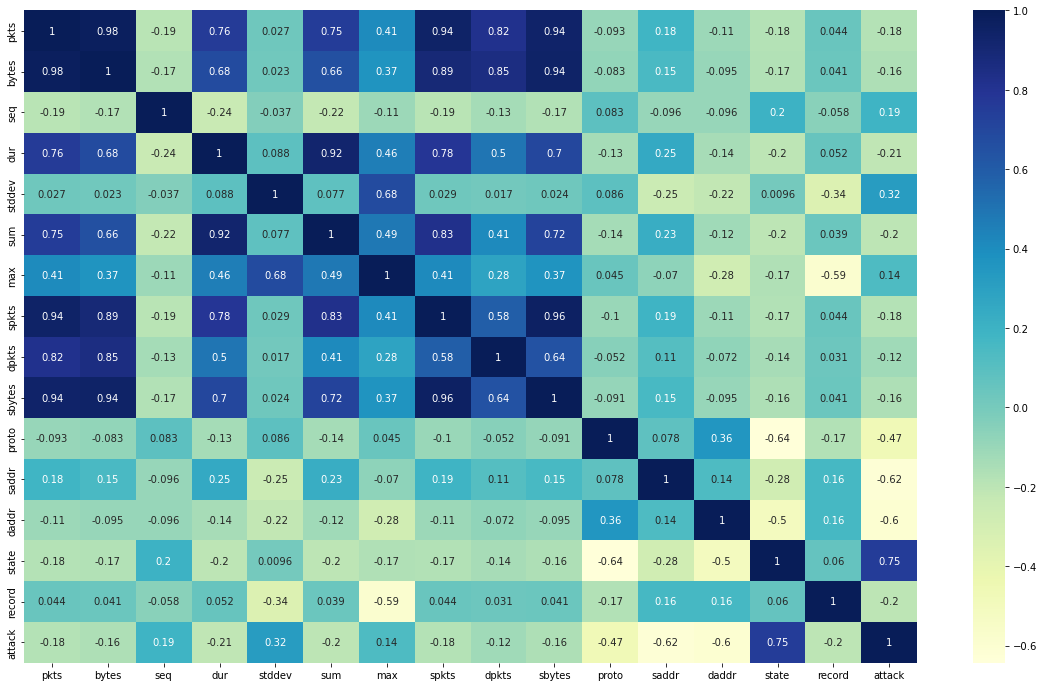

In [79]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [80]:
X=df2.drop(["attack"], axis="columns")
Y=df2["attack"]

## Train-Test Split

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [82]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [83]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [84]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
top15_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [85]:
algorithm.append("Logistic Regression")

In [86]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [87]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [88]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [90]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

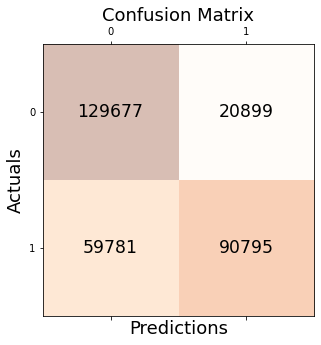

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [92]:
algorithm.append("Decision Tree")

In [93]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [94]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [95]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [96]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [97]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

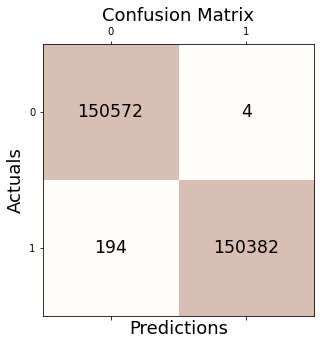

In [98]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [99]:
algorithm.append("Random Forest")

In [100]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [101]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [102]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [103]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [104]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

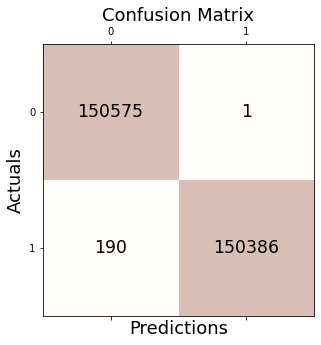

In [105]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [106]:
algorithm.append("KNN")

In [107]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [108]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [109]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [110]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [111]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

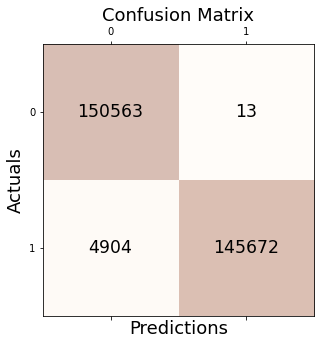

In [112]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [113]:
top15_df["Algorithms"]=algorithm
top15_df["Precision"]=precision
top15_df["Recall"]=recall
top15_df["Accuracy"]=accuracy
top15_df["F1-Score"]=f1
top15_df["Error Rate"]=error

In [114]:
top15_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.751988,0.732096,0.732095,0.717396,0.267905
1,Decision Tree,0.999348,0.999343,0.999343,0.999343,0.000657
2,Random Forest,0.999371,0.999366,0.999366,0.999366,0.000634
3,KNN,0.984540,0.983673,0.983673,0.983656,0.016327


<AxesSubplot:xlabel='Algorithms'>

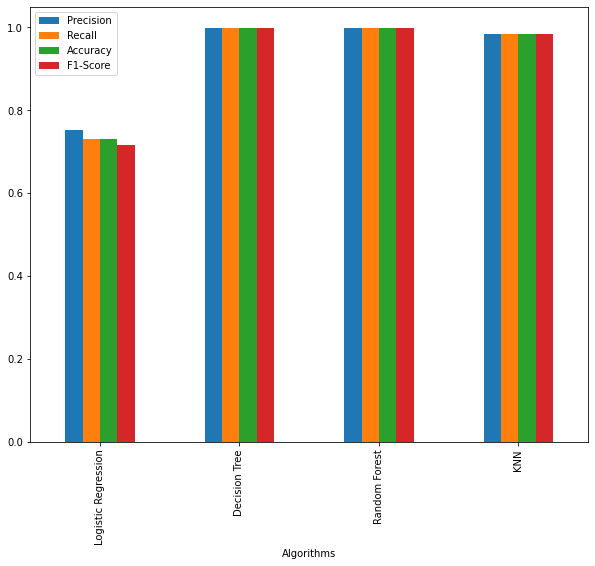

In [115]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top15_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# ANN

In [116]:
algorithm.append("ANN")

In [117]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                256       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
6588/6588 [==============================] - 5s 729us/step - loss: 0.0914 - accuracy: 0.9756
Epoch 2/10
6588/6588 [==============================] - 5s 743us/step - loss: 0.0337 - accuracy: 0.9902
Epoch 3/10
6588/6588 [==============================] - 5s 747us/step - loss: 0.0284 - accuracy: 0.9936
Epoch 4/10
6588/6588 [==============================] - 5s 735us/step - loss: 0.0252 - accuracy: 0.9946
Epoch 5/10
6588/6588 [==============================] - 5s 778us/step - loss: 0.0227 - accuracy: 0.9954
Epoch 6/10
6588/6588 [==============================] - 5s 723us/step - loss: 0.0207 - accuracy: 0.9960
Epoch 7/10
6588/6588 [==============================] - 5s 715us/step - loss: 0.0190 - accuracy: 0.9967
Epoch 8/10
6588/6588 [==============================] - 5s 733us/step - loss: 0.0176 - accuracy: 0.9971
Epoch 9/10
6588/6588 [==============================] - 5s 730us/step - loss: 0.0163 - accuracy: 0.9971
Epoch 10/10
6588/6588 [==============================] - 5s 702u

In [119]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [120]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [121]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

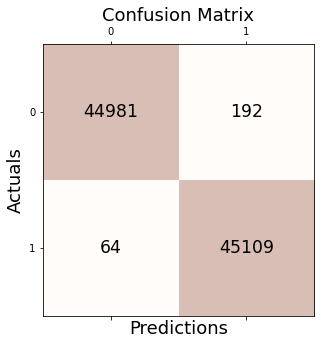

In [122]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [123]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [124]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
top15_df = pd.DataFrame(columns = column_names)

In [125]:
top15_df["Algorithms"]=algorithm
top15_df["Precision"]=precision
top15_df["Recall"]=recall
top15_df["Accuracy"]=accuracy
top15_df["F1-Score"]=f1
top15_df["Error Rate"]=error

In [126]:
top15_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.751988,0.732096,0.732095,0.717396,0.267905
1,Decision Tree,0.999348,0.999343,0.999343,0.999343,0.000657
2,Random Forest,0.999371,0.999366,0.999366,0.999366,0.000634
3,KNN,0.984540,0.983673,0.983673,0.983656,0.016327
4,ANN,0.997170,0.997166,0.997166,0.997166,0.002834


<AxesSubplot:xlabel='Algorithms'>

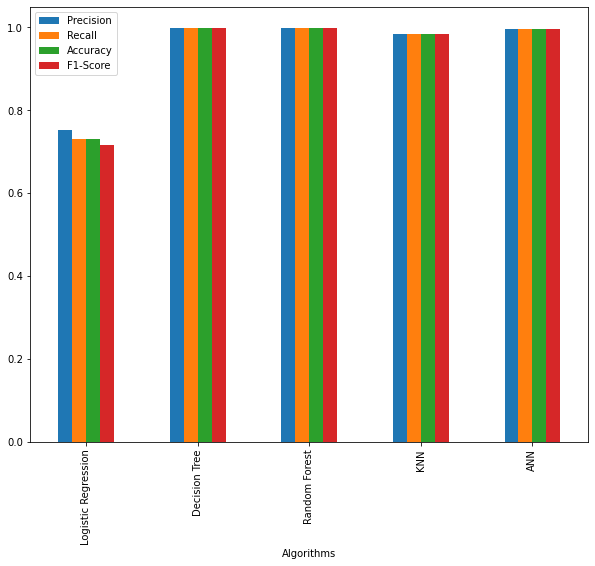

In [127]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
top15_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# Considering all 21 features

## Correlation of each column

In [128]:
df.corr()

,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,...,dbytes,rate,srate,drate,proto,saddr,daddr,state,record,attack
pkts,1.000000,0.976662,-0.190208,0.757009,0.488208,0.027142,0.751631,0.138114,0.406922,0.944571,...,0.804813,-0.016313,-0.002685,-0.000540,-0.093114,0.179233,-0.106033,-0.179241,0.043800,-0.176564
bytes,0.976662,1.000000,-0.172167,0.683782,0.442262,0.023454,0.659787,0.131854,0.368264,0.891471,...,0.851385,-0.014698,-0.002190,0.000812,-0.083207,0.149723,-0.094717,-0.168701,0.040803,-0.159312
seq,-0.190208,-0.172167,1.000000,-0.239174,-0.119812,-0.037207,-0.223012,0.024511,-0.108427,-0.193063,...,-0.130057,0.007507,0.023725,0.030327,0.082692,-0.096497,-0.096075,0.203987,-0.057676,0.186793
dur,0.757009,0.683782,-0.239174,1.000000,0.526082,0.088128,0.924544,0.105565,0.458934,0.784566,...,0.489432,-0.024667,-0.008172,-0.009228,-0.134791,0.249069,-0.141637,-0.203182,0.052487,-0.211743
mean,0.488208,0.442262,-0.119812,0.526082,1.000000,0.512999,0.566105,0.725485,0.970841,0.495472,...,0.334177,-0.050849,-0.021159,-0.022400,0.046020,-0.003326,-0.264698,-0.216313,-0.592534,0.056704
stddev,0.027142,0.023454,-0.037207,0.088128,0.512999,1.000000,0.076880,0.075259,0.684483,0.028819,...,0.016281,-0.046941,-0.024115,-0.026258,0.085891,-0.252481,-0.219337,0.009640,-0.344045,0.324662
sum,0.751631,0.659787,-0.223012,0.924544,0.566105,0.076880,1.000000,0.121335,0.486472,0.825620,...,0.405551,-0.020011,-0.005370,-0.007173,-0.136109,0.226524,-0.120413,-0.200583,0.038907,-0.204647
min,0.138114,0.131854,0.024511,0.105565,0.725485,0.075259,0.121335,1.000000,0.657475,0.117266,...,0.133326,-0.032781,-0.013808,-0.013736,0.090233,-0.038633,-0.164083,-0.142098,-0.691443,0.060558
max,0.406922,0.368264,-0.108427,0.458934,0.970841,0.684483,0.486472,0.657475,1.000000,0.413114,...,0.278144,-0.055544,-0.024470,-0.026105,0.045479,-0.070241,-0.279474,-0.167081,-0.588690,0.136480
spkts,0.944571,0.891471,-0.193063,0.784566,0.495472,0.028819,0.825620,0.117266,0.413114,1.000000,...,0.573515,-0.016644,-0.002668,-0.003376,-0.101710,0.190758,-0.108349,-0.171690,0.044147,-0.179247


In [129]:
corr_matrix=df.corr()

## Visualizing the correlation through heatmap

<AxesSubplot:>

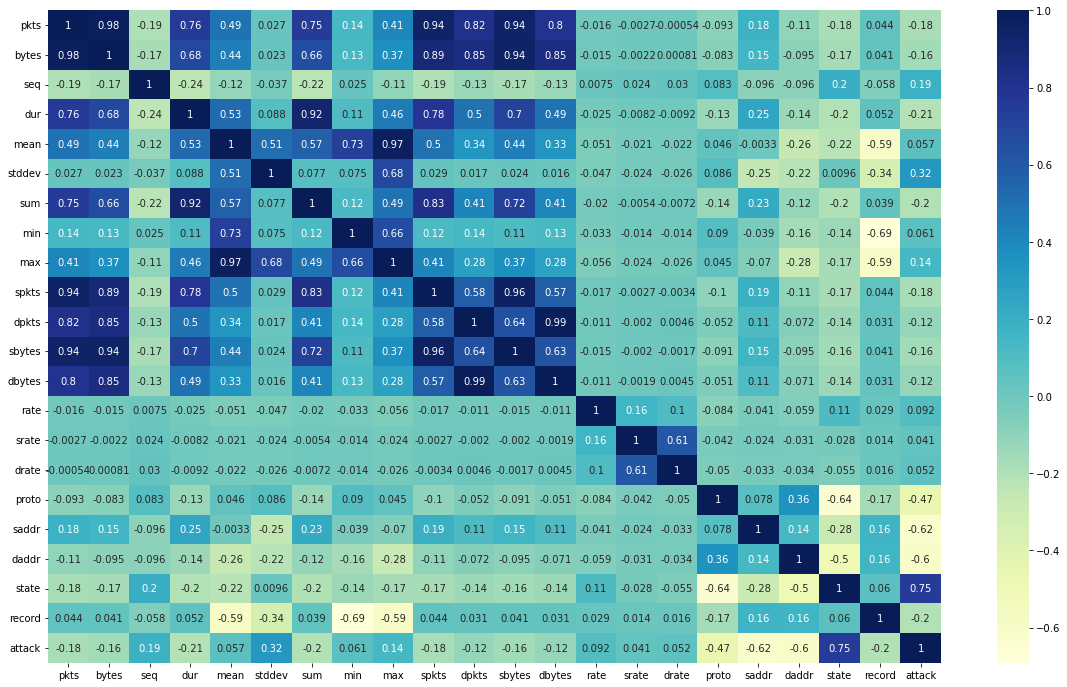

In [130]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix, annot=True, ax=ax,cmap="YlGnBu")

In [131]:
X=df.drop(["attack"], axis="columns")
Y=df["attack"]

## Train-Test Split

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y, shuffle=True)

## Scaling

In [133]:
scaler = StandardScaler().fit(X_train)

train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

In [134]:
scaler_new = StandardScaler()
X = scaler_new.fit_transform(X)

In [135]:
algorithm=[]
precision=[]
recall=[]
accuracy=[]
f1=[]
error=[]

In [136]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score", "Error Rate"]
all_df = pd.DataFrame(columns = column_names)

## Logistic Regression

In [137]:
algorithm.append("Logistic Regression")

In [138]:
Log_Reg=LogisticRegression(C=5,multi_class='auto', max_iter=1000)

In [139]:
precision.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Log_Reg,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [140]:
y_pred = cross_val_predict(Log_Reg, X, Y, cv=10)

In [141]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [142]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

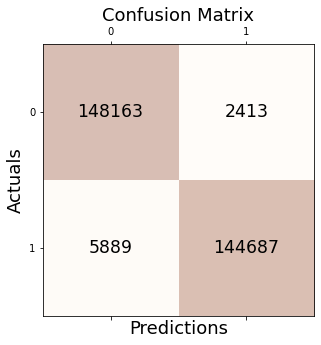

In [143]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree

In [144]:
algorithm.append("Decision Tree")

In [145]:
DT = tree.DecisionTreeClassifier(random_state=42,criterion = 'entropy')

In [146]:
precision.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=DT,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [147]:
y_pred = cross_val_predict(DT, X, Y, cv=10)

In [148]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [149]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

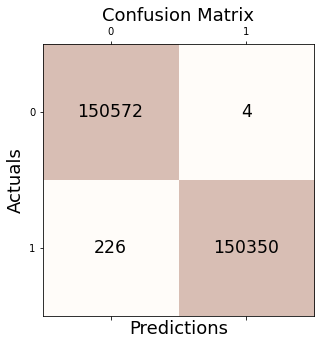

In [150]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Random Forest

In [151]:
algorithm.append("Random Forest")

In [152]:
Rf_model=RandomForestClassifier(random_state=42,n_estimators=10)

In [153]:
precision.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=Rf_model,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [154]:
y_pred = cross_val_predict(Rf_model, X, Y, cv=10)

In [155]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [156]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

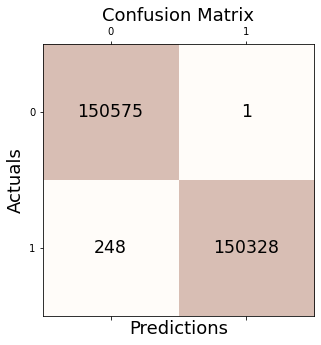

In [157]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## KNN

In [158]:
algorithm.append("KNN")

In [159]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [160]:
precision.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='precision_macro', cv=10).mean())
recall.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='recall_macro', cv=10).mean())
accuracy.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='accuracy', cv=10).mean())
f1.append(cross_val_score(estimator=knn,X=X, y=Y,scoring='f1_macro', cv=10).mean())

In [161]:
y_pred = cross_val_predict(knn, X, Y, cv=10)

In [162]:
conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred)

In [163]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

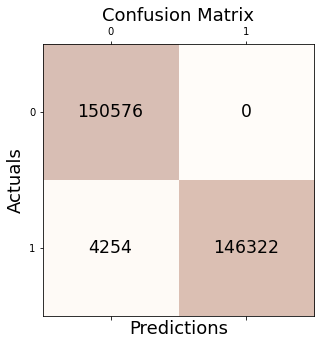

In [164]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Results

In [165]:
all_df["Algorithms"]=algorithm
all_df["Precision"]=precision
all_df["Recall"]=recall
all_df["Accuracy"]=accuracy
all_df["F1-Score"]=f1
all_df["Error Rate"]=error

In [166]:
all_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.976015,0.972433,0.972432,0.972049,0.027567
1,Decision Tree,0.999242,0.999236,0.999236,0.999236,0.000764
2,Random Forest,0.999183,0.999173,0.999173,0.999173,0.000827
3,KNN,0.988659,0.985875,0.985874,0.985637,0.014126


<AxesSubplot:xlabel='Algorithms'>

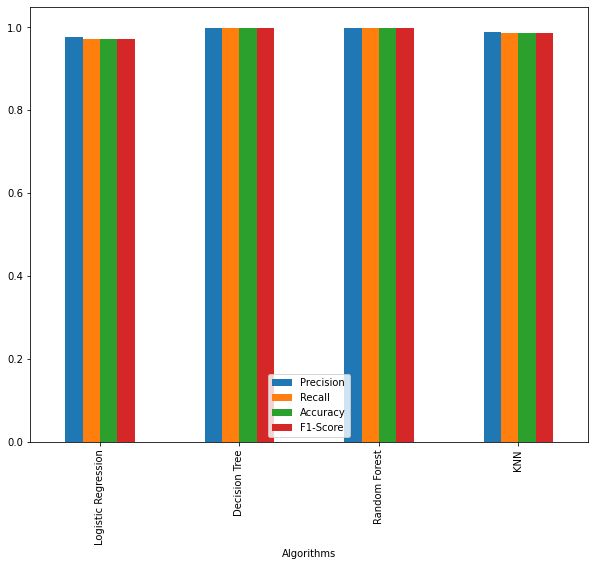

In [167]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
all_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# ANN

In [168]:
algorithm.append("ANN")

In [169]:
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                352       
                                                                 
 dense_5 (Dense)             (None, 5)                 85        
                                                                 
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.fit(train_sc, Y_train, epochs=10, verbose=1)

Epoch 1/10
6588/6588 [==============================] - 5s 793us/step - loss: 0.0761 - accuracy: 0.9828
Epoch 2/10
6588/6588 [==============================] - 5s 782us/step - loss: 0.0324 - accuracy: 0.9926
Epoch 3/10
6588/6588 [==============================] - 5s 815us/step - loss: 0.0261 - accuracy: 0.9946
Epoch 4/10
6588/6588 [==============================] - 5s 771us/step - loss: 0.0224 - accuracy: 0.9954
Epoch 5/10
6588/6588 [==============================] - 5s 777us/step - loss: 0.0202 - accuracy: 0.9960
Epoch 6/10
6588/6588 [==============================] - 5s 809us/step - loss: 0.0184 - accuracy: 0.9965
Epoch 7/10
6588/6588 [==============================] - 5s 775us/step - loss: 0.0170 - accuracy: 0.9968
Epoch 8/10
6588/6588 [==============================] - 5s 820us/step - loss: 0.0158 - accuracy: 0.9973
Epoch 9/10
6588/6588 [==============================] - 6s 859us/step - loss: 0.0148 - accuracy: 0.9971
Epoch 10/10
6588/6588 [==============================] - 5s 762u

In [171]:
predict_x=model.predict(test_sc) 
y_test_pred=np.argmax(predict_x,axis=1)

In [172]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_test_pred)

In [173]:
error.append((sum(sum(conf_matrix)) - conf_matrix.diagonal().sum())/sum(sum(conf_matrix)))

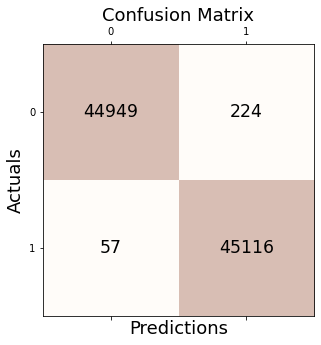

In [174]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [175]:
precision.append(precision_score(Y_test, y_test_pred, average='macro'))
recall.append(recall_score(Y_test, y_test_pred, average='macro'))
accuracy.append(accuracy_score(Y_test, y_test_pred))
f1.append(f1_score(Y_test, y_test_pred, average='macro'))

In [176]:
column_names = ["Algorithms", "Precision", "Recall", "Accuracy", "F1-Score"]
all_df = pd.DataFrame(columns = column_names)

In [177]:
all_df["Algorithms"]=algorithm
all_df["Precision"]=precision
all_df["Recall"]=recall
all_df["Accuracy"]=accuracy
all_df["F1-Score"]=f1
all_df["Error Rate"]=error

In [178]:
all_df

,Algorithms,Precision,Recall,Accuracy,F1-Score,Error Rate
0,Logistic Regression,0.976015,0.972433,0.972432,0.972049,0.027567
1,Decision Tree,0.999242,0.999236,0.999236,0.999236,0.000764
2,Random Forest,0.999183,0.999173,0.999173,0.999173,0.000827
3,KNN,0.988659,0.985875,0.985874,0.985637,0.014126
4,ANN,0.996897,0.996890,0.996890,0.996890,0.003110


<AxesSubplot:xlabel='Algorithms'>

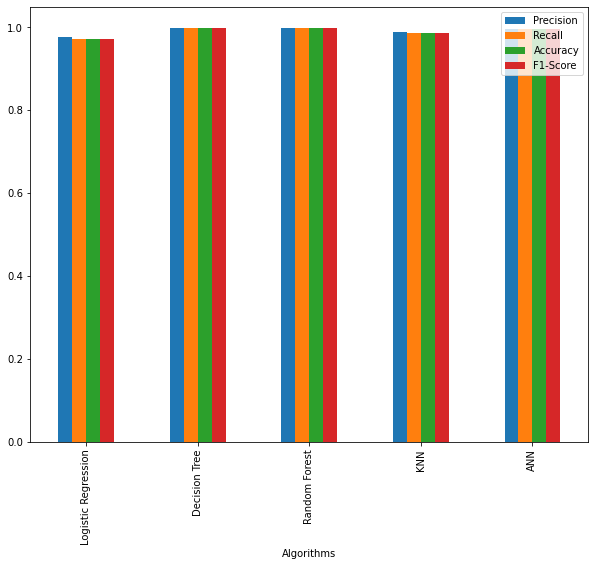

In [179]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
all_df.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-Score"], kind="bar", ax=ax)

# GridSearchCV

In [180]:
model_params = {
    'Logisitic Regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [0.1,1,10],
            'penalty':['l1','l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth': [2,4,6,8,10,12],

        }
    },
    
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
            'n_estimators': [10,100,200],
            'criterion': ['gini','entropy'],
            'max_depth': [2,4,6,8,10,12]
        }
    },

    'KNN': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,6,7,8,9,10,20]
    
        } 
        
    }     
}

In [181]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=10, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ,return_train_score=True,refit="accuracy")
    clf.fit(X, Y)
    i=clf.best_index_
    scores.append({
        'Algorithms': model_name,
        'Precision': clf.cv_results_['mean_test_precision_macro'][i],
        'Recall': clf.cv_results_['mean_test_recall_macro'][i],
        'Accuracy': clf.best_score_,
        'F1-score': clf.cv_results_['mean_test_f1_macro'][i],
        'Best Parameters': clf.best_params_
    })

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\vsneg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
GSC_results = pd.DataFrame(scores,columns=['Algorithms','Precision', 'Recall', 'Accuracy', 'F1-score', 'Best Parameters'])
GSC_results

,Algorithms,Precision,Recall,Accuracy,F1-score,Best Parameters
0,Logisitic Regression,0.975923,0.973436,0.973435,0.973231,"{'C': 0.1, 'penalty': 'l2'}"
1,Decision Tree,0.999242,0.999236,0.999236,0.999236,"{'criterion': 'entropy', 'max_depth': 12}"
2,Random Forest,0.999897,0.999897,0.999897,0.999897,"{'criterion': 'gini', 'max_depth': 10, 'n_esti..."
3,KNN,0.988659,0.985875,0.985874,0.985637,{'n_neighbors': 5}


<AxesSubplot:xlabel='Algorithms'>

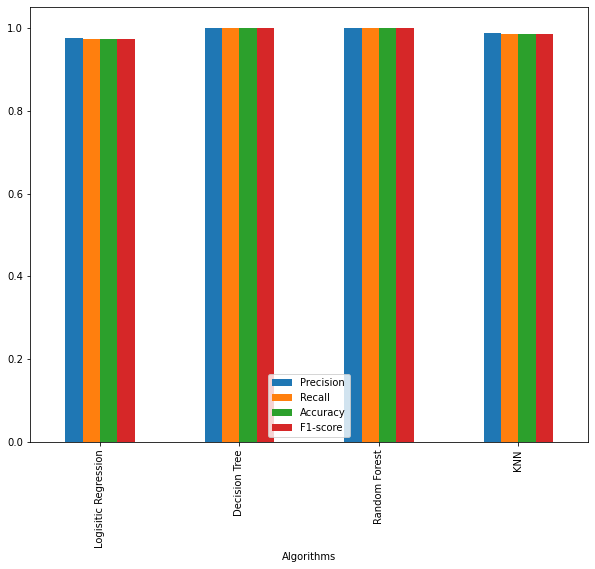

In [183]:
fig_dim=(10,8)
fig,ax=plt.subplots(figsize=fig_dim)
GSC_results.plot(x="Algorithms", y=["Precision", "Recall", "Accuracy","F1-score"], kind="bar", ax=ax)

In [184]:
GSC_results["Best Parameters"]

0                          {'C': 0.1, 'penalty': 'l2'}
1            {'criterion': 'entropy', 'max_depth': 12}
2    {'criterion': 'gini', 'max_depth': 10, 'n_esti...
3                                   {'n_neighbors': 5}
Name: Best Parameters, dtype: object